**Auto-Encoders**:

- AE is a type of neural network designed for unsupervised learning.
- It consists of an encoder and a decoder.
- The encoder compresses the input data into a lower-dimensional representation (latent space), while the decoder reconstructs the original input from this representation.
- Typically, AEs have a single hidden layer between the input and output layers.
- They are used for feature extraction, data denoising, and dimensionality reduction.

Training Auto-Encoders:
- Trained using backpropagation and gradient descent.
- Reconstruction loss (e.g., mean squared error) guides the training.
- Can be fine-tuned for specific tasks after pretraining.



In [1]:
# Install PyTorch and torchvision
#!pip install torch torchvision
!pip install torchviz


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=d5aeb4c741413e55db1fb0f533ccd5b78127fa6d41be73a3337cf8d2adf8a2b5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, encoding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid(),  # Sigmoid activation to ensure outputs are in [0, 1]
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
from torchsummary import summary

# Load the trained model
complex_autoencoder = Autoencoder(encoding_dim=2)
#complex_autoencoder.load_state_dict(torch.load('autoencoder_model.pth'))

# Move the model to the CPU
complex_autoencoder.to('cuda:0')

# Print the summary of the encoder
summary(complex_autoencoder.encoder, (128, 1, 784))  # Assuming MNIST images (1 channel, 28x28)

# Print the summary of the decoder
summary(complex_autoencoder.decoder, (2,))  # Assuming encoding_dim is 2


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1          [-1, 128, 1, 512]         401,920
              ReLU-2          [-1, 128, 1, 512]               0
            Linear-3          [-1, 128, 1, 256]         131,328
              ReLU-4          [-1, 128, 1, 256]               0
            Linear-5            [-1, 128, 1, 2]             514
Total params: 533,762
Trainable params: 533,762
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 1.50
Params size (MB): 2.04
Estimated Total Size (MB): 3.92
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]             768
              ReLU-2                  [-1

### Training function

In [1]:
# Function to train the autoencoder
def train_autoencoder(model, dataloader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        for data in dataloader:
            inputs, _ = data

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs.view(inputs.size(0), -1))
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


### Training

In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Define hyperparameters
encoding_dim = 2
batch_size = 128
learning_rate = 0.001
num_epochs = 20

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the autoencoder model, criterion, and optimizer
autoencoder_model = Autoencoder(encoding_dim=encoding_dim)
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)


# Train the autoencoder
train_autoencoder(autoencoder_model, train_loader, criterion, optimizer, num_epochs=num_epochs)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.11MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.22MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/20, Loss: 0.048227377235889435
Epoch 2/20, Loss: 0.04274308308959007
Epoch 3/20, Loss: 0.03701207786798477
Epoch 4/20, Loss: 0.04118278995156288
Epoch 5/20, Loss: 0.04034752771258354
Epoch 6/20, Loss: 0.040008291602134705
Epoch 7/20, Loss: 0.04075079783797264
Epoch 8/20, Loss: 0.03756662458181381
Epoch 9/20, Loss: 0.037444546818733215
Epoch 10/20, Loss: 0.037554457783699036
Epoch 11/20, Loss: 0.03652656823396683
Epoch 12/20, Loss: 0.03581954538822174
Epoch 13/20, Loss: 0.0340394489467144
Epoch 14/20, Loss: 0.04035919904708862
Epoch 15/20, Loss: 0.035538483411073685
Epoch 16/20, Loss: 0.03619882091879845
Epoch 17/20, Loss: 0.034360650926828384
Epoch 18/20, Loss: 0.03576340153813362
Epoch 19/20, Loss: 0.03701302781701088
Epoch 20/20, Loss: 0.03649537265300751


In [ ]:
torch.save(autoencoder_model.state_dict(), 'autoencoder_model.pth')
print("Trained model saved.")

Trained model saved.


### Visualize

[7 2 1 ... 4 5 6]


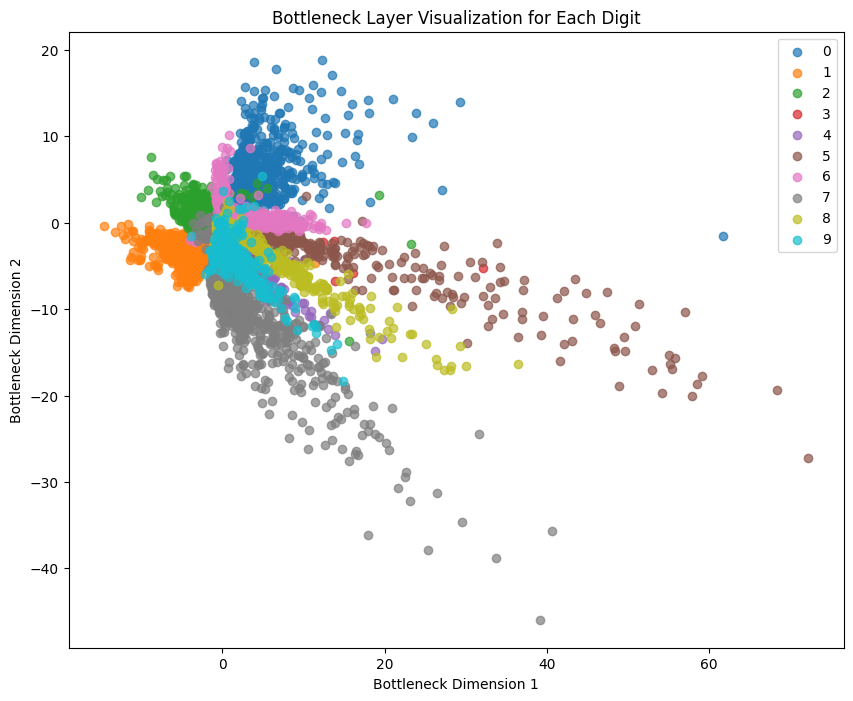

In [ ]:
# Function to visualize the bottleneck layer for each digit
def visualize_bottleneck(encoder, dataloader):
    encoder.eval()
    all_embeddings = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            embeddings = encoder(inputs.view(inputs.size(0), -1)).detach().numpy()
            all_embeddings.append(torch.from_numpy(embeddings))  # Convert to PyTorch tensor
            all_labels.append(labels)

    all_embeddings = torch.cat(all_embeddings, dim=0)
    all_labels = torch.cat(all_labels, dim=0).numpy()  # Convert to NumPy array

    # Plot 2D representations, color-coded by digit label
    plt.figure(figsize=(10, 8))
    print(all_labels)
    for digit in range(10):
        digit_indices = (all_labels == digit)
        plt.scatter(all_embeddings[digit_indices, 0], all_embeddings[digit_indices, 1], label=str(digit), alpha=0.7)

    plt.title('Bottleneck Layer Visualization for Each Digit')
    plt.xlabel('Bottleneck Dimension 1')
    plt.ylabel('Bottleneck Dimension 2')
    plt.legend()
    plt.show()

# Load the trained autoencoder
autoencoder_model = Autoencoder(encoding_dim=2)  # Assuming you have a trained Autoencoder
autoencoder_model.load_state_dict(torch.load('autoencoder_model.pth'))  # Load the saved model

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset), shuffle=False)

# Visualize the bottleneck layer for each digit
visualize_bottleneck(autoencoder_model.encoder, test_loader)


In [ ]:
# Function to visualize original and reconstructed images
def visualize_results(model, dataloader, num_images=10):
    model.eval()
    dataiter = iter(dataloader)
    images, _ = next(dataiter)  # Use next() instead of dataiter.next()
    images = images.view(images.size(0), -1)

    with torch.no_grad():
        reconstructed_images = model(images)

    images = images.numpy()
    reconstructed_images = reconstructed_images.numpy()

    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Original images
        plt.subplot(2, num_images, i + 1)
        plt.imshow(np.reshape(images[i], (28, 28)), cmap='gray')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(np.reshape(reconstructed_images[i], (28, 28)), cmap='gray')
        plt.axis('off')

    plt.show()

# Visualize original and reconstructed images
visualize_results(autoencoder_model, train_loader, num_images=10)



Epoch 1/20, Loss: 0.18163931369781494
Epoch 2/20, Loss: 0.13741721212863922
Epoch 3/20, Loss: 0.12334132194519043
Epoch 4/20, Loss: 0.11524076014757156
Epoch 5/20, Loss: 0.11619883030653
Epoch 6/20, Loss: 0.12043830752372742
Epoch 7/20, Loss: 0.11571429669857025
Epoch 8/20, Loss: 0.11391324549913406
Epoch 9/20, Loss: 0.1127939522266388
Epoch 10/20, Loss: 0.11069522053003311
Epoch 11/20, Loss: 0.11503105610609055
Epoch 12/20, Loss: 0.11062443256378174
Epoch 13/20, Loss: 0.1122005507349968
Epoch 14/20, Loss: 0.10714855045080185
Epoch 15/20, Loss: 0.10889934003353119
Epoch 16/20, Loss: 0.11234124004840851
Epoch 17/20, Loss: 0.11561888456344604
Epoch 18/20, Loss: 0.107874795794487
Epoch 19/20, Loss: 0.10981454700231552
Epoch 20/20, Loss: 0.11451040953397751


AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'